# **Ejemplo** algoritmo ml supervisado de computervision, para clasificar en 10 diferentes clases que vestimenta 


*   Usar dataset en la base de datos de Keras (Fashion MIST: 28x28, 70k imagenes en escala de grises)
*   El etiquetado esta entre 10 clases



#Importamos tensor y numpy, tensor 2x ya viene incluido keras


In [24]:
import numpy as np
%tensorflow_version 2.x   # Para garantizar que la versión 2.x sea importada
import tensorflow as tf
print('Versión de TensorFlow: ' + tf.__version__)

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x   # Para garantizar que la versión 2.x sea importada`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.
Versión de TensorFlow: 2.4.1


#Creamos un objeto mnist para poder obtener de la API de Keras el dataset fashion 

In [3]:
mnist = tf.keras.datasets.fashion_mnist 

#Llama los datos de entrenamiento, y de prueba, con sus respectivas etiquetas

In [4]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


#Para poder visualizar las matrices, un ejemplo de ellos podemos usar matplotlib para ver, y importamos la libreria numeria de numpy

Esta imagen pertenece a la clase 9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1

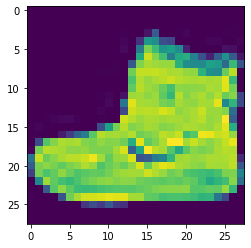

In [11]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(training_images[0])
print("Esta imagen pertenece a la clase",training_labels[0])
print(training_images[0])

#Una parte importante es la Normalización de los datos, para ello vamos a pasar valores de 0-255, a valores 0-1

In [12]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

#Definimos el modelo de RN donde tenemos una secuencia de 3 capas

*   Flatten: pasa los datos de matriz a vector lineal simple y definimo el input
*   Capa oculta donde se trata de inferir las reglas, y es de dencidad 128, usa funcion Relu, la cual devuelve el valor max entre 0 y x:
 **f(x) = max (0,x)**
*   Capa de dencidad 10, que debe coincidir con las clases de salida

 #Imprimimos el resumen de parametros 


In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=[28,28]), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
model.summary()

#Compilamos el modelo asignando la funcion de perdida, el optimizador y la metrica

In [17]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

#Entrenamos el modelo

In [19]:
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3336 - accuracy: 0.8789
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3106 - accuracy: 0.8868
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2937 - accuracy: 0.8921
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2782 - accuracy: 0.8978
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2707 - accuracy: 0.8996


#evaluamos el modelo con el conjunto de datos de prueba

In [20]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.3504 - accuracy: 0.8758


[0.35041236877441406, 0.8758000135421753]

#Probar

In [23]:
classifications = model.predict(test_images)

print(classifications[0])
print("La clasificacion es la de mayor peso osea:",test_labels[0])

[8.2497286e-07 1.3615142e-08 3.6895158e-06 2.9667305e-10 3.7695433e-08 3.2437814e-03 5.0516542e-06 8.9351758e-03 6.3287376e-07 9.8781079e-01]
La clasificacion es la de mayor peso osea: 9
